In [1]:
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile
import numpy as np
from qiskit.visualization import plot_histogram

In [2]:
input_n = 3

### Balanced Oracle

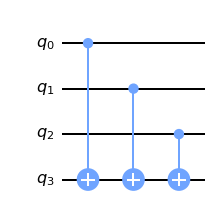

In [29]:
balanced_oracle = QuantumCircuit(input_n+1)
for qubit in range(input_n):
    balanced_oracle.cnot(qubit,input_n)
    
balanced_oracle.draw('mpl')

### Deutsch Jozsa Algorithm

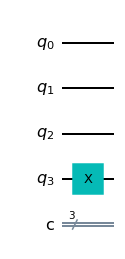

In [23]:
deutsch_jozsa_circuit = QuantumCircuit(input_n+1, input_n)

# Step 1 : Apply X gate to second register
deutsch_jozsa_circuit.x(input_n)
deutsch_jozsa_circuit.draw('mpl')

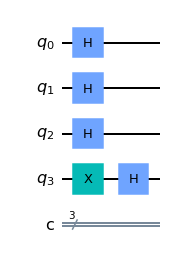

In [24]:
# Step 2 : Apply Hadamard gate to each qubit
for qubit in range(input_n+1):
    deutsch_jozsa_circuit.h(qubit)
deutsch_jozsa_circuit.draw('mpl')

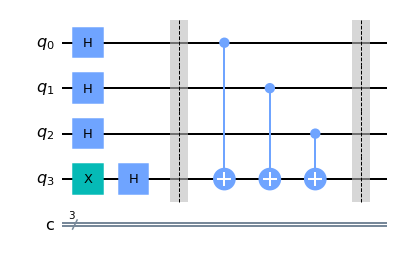

In [25]:
# Step 3 : Apply oracle
# Here we are applying Balanced Oracle

deutsch_jozsa_circuit.barrier()
deutsch_jozsa_circuit += balanced_oracle
deutsch_jozsa_circuit.barrier()
deutsch_jozsa_circuit.draw('mpl')

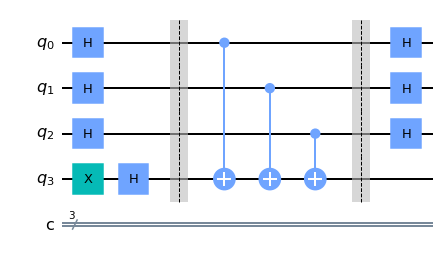

In [26]:
# Step 4 : Apply Hadamard on input register
for qubit in range(input_n):
    deutsch_jozsa_circuit.h(qubit)
deutsch_jozsa_circuit.draw('mpl')

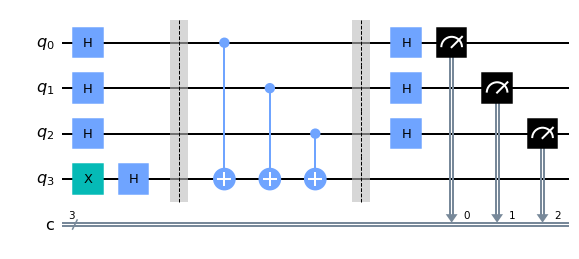

In [27]:
# Step 5 : Measure the input register
for i in range(input_n):
    deutsch_jozsa_circuit.measure(i,i)
deutsch_jozsa_circuit.draw('mpl')

c:\users\aditi\anaconda3\envs\quantum\lib\site-packages\qiskit\utils\deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


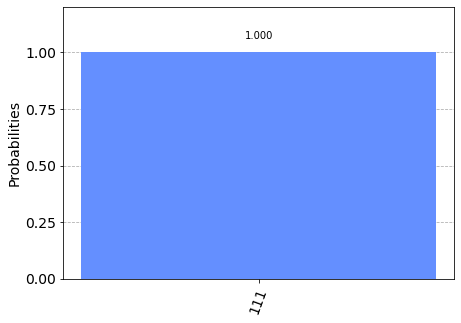

In [28]:
# Output using Local Simulator
simulator = Aer.get_backend('aer_simulator')
qobj = assemble(deutsch_jozsa_circuit, simulator)
results = simulator.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)